In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.patches as mpatches
import seaborn as sns
import pylab as pl
from pykalman import KalmanFilter
%matplotlib inline

In [183]:
# Setting pandas display all columns options to ON
pd.options.display.max_columns=999
pd.options.display.max_rows=1999

# Setting Numpy suppress scientific notation to ON
np.set_printoptions(suppress=True)

In [184]:
# REading the first segment of 39A Inbound = 767_768
# colnames=['arrivaltime', 'traveltime', 'segmentid', 'dayofweek','rain','temp']
colnames=['arrivaltime', 'traveltime', 'segmentid', 'dayofweek','rain','temp']
df = pd.read_csv("SegmentedSamples2_actual/767_768.csv", sep=',',names=colnames)
# df1 = df1.sort_values('arrivaltime',ascending=True)
df.head(5)

,arrivaltime,traveltime,segmentid,dayofweek,rain,temp
0,32380,91.0,767_768,Thursday,0.0,13.1
1,53523,124.0,767_768,Tuesday,0.0,8.1
2,39607,152.0,767_768,Tuesday,0.0,11.3
3,58016,98.0,767_768,Wednesday,0.0,13.8
4,39612,76.0,767_768,Tuesday,0.6,15.8


In [185]:
# Code adapted from https://www.quantopian.com/posts/quantopian-lecture-series-kalman-filters
# The Kalman filter
kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance=1,
                  transition_covariance=.01)

# Use the observed values of the price to get a rolling mean
state_means, _ = kf.filter(df1.traveltime.values)
state_means = pd.Series(state_means.flatten(), index=df1.index)

## Plot the difference between 'traveltime' and 'traveltime with a Kalman filter'

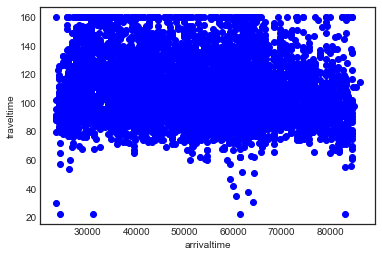

In [186]:
# Raw data
df1.plot(kind='scatter', x='arrivaltime', y='traveltime')
x = df['arrivaltime']
y = df['traveltime']

plt.plot(x, y, 'o', color='blue');

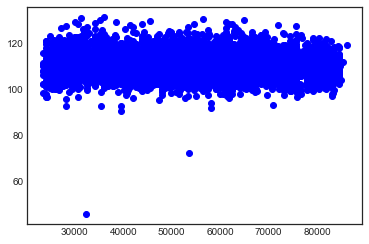

In [187]:
# With Kalman filter applied
x = df['arrivaltime']
y = state_means

plt.plot(x, y, 'o', color='blue');

The Kalman filter removes a lot of noise from the original travel duration time.

In [188]:
df = pd.concat([df, state_means], axis=1)
df.head(5)

,arrivaltime,traveltime,segmentid,dayofweek,rain,temp,0
0,32380,91.0,767_768,Thursday,0.0,13.1,45.500000
1,53523,124.0,767_768,Tuesday,0.0,8.1,72.013245
2,39607,152.0,767_768,Tuesday,0.0,11.3,92.651565
3,58016,98.0,767_768,Wednesday,0.0,13.8,93.782064
4,39612,76.0,767_768,Tuesday,0.6,15.8,90.559113


In [189]:
df.columns = ['arrivaltime', 'traveltime','segmentid', 'dayofweek', 'rain', 'temp', 'kalmar_time']

## Clean the data further

In [190]:
df.drop('segmentid',axis=1,inplace=True)

In [191]:
df

,arrivaltime,traveltime,dayofweek,rain,temp,kalmar_time
0,32380,91.0,Thursday,0.0,13.1,45.500000
1,53523,124.0,Tuesday,0.0,8.1,72.013245
2,39607,152.0,Tuesday,0.0,11.3,92.651565
3,58016,98.0,Wednesday,0.0,13.8,93.782064
4,39612,76.0,Tuesday,0.6,15.8,90.559113
5,28163,103.0,Friday,0.0,12.4,92.556419
6,70849,96.0,Friday,0.0,6.2,93.058136
7,35418,89.0,Monday,0.0,8.3,92.511421
8,58170,86.0,Tuesday,0.0,17.1,91.688218
9,28187,124.0,Wednesday,0.0,7.1,95.567153


#### Converting the dataframe to respective datatype

In [192]:
df.dtypes

arrivaltime      int64
traveltime     float64
dayofweek       object
rain           float64
temp           float64
kalmar_time    float64
dtype: object

In [193]:
#We need to convert only one column
df['dayofweek'] = df['dayofweek'].astype('category')

In [194]:
df.dtypes

arrivaltime       int64
traveltime      float64
dayofweek      category
rain            float64
temp            float64
kalmar_time     float64
dtype: object

In [195]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
arrivaltime,5782.0,52199.174334,15901.148036,23355.0,39221.2500,52181.000000,64067.750000,86194.000000
traveltime,5782.0,110.963680,22.544731,22.0,94.0000,108.000000,125.000000,160.500000
rain,5781.0,0.092233,0.534049,0.0,0.0000,0.000000,0.000000,17.400000
temp,5782.0,9.878606,4.660570,-2.6,6.5000,9.700000,13.000000,27.500000
kalmar_time,5782.0,110.908159,5.322757,45.5,107.3772,110.828443,114.209483,131.353282


In [196]:
# DQR for Continuous COlumns

In [197]:
cont_description = df.select_dtypes(['int64','float64']).describe().T
miss=[]
for i,m in enumerate(df.select_dtypes(['int64','float64']).columns):
    miss.append(100-((cont_description['count'][i]/df.select_dtypes(['int64','float64']).shape[0])*100))
cont_description['% miss']=miss

In [198]:
cont_description

,count,mean,std,min,25%,50%,75%,max,% miss
arrivaltime,5782.0,52199.174334,15901.148036,23355.0,39221.2500,52181.000000,64067.750000,86194.000000,0.000000
traveltime,5782.0,110.963680,22.544731,22.0,94.0000,108.000000,125.000000,160.500000,0.000000
rain,5781.0,0.092233,0.534049,0.0,0.0000,0.000000,0.000000,17.400000,0.017295
temp,5782.0,9.878606,4.660570,-2.6,6.5000,9.700000,13.000000,27.500000,0.000000
kalmar_time,5782.0,110.908159,5.322757,45.5,107.3772,110.828443,114.209483,131.353282,0.000000


In [199]:
# Imputation of rows with mean value
df['rain'].fillna(df['rain'].mean(),inplace=True)

In [200]:
# Data Quality Report
category_desc = df.select_dtypes(['category']).describe().T
miss=[]
freq=[]
for i,cols in enumerate(df.select_dtypes(['category']).columns):
    miss.append(100-((category_desc['count'][i]/df.select_dtypes(['category']).shape[0])*100))
    freq.append((category_desc['freq'][i]/category_desc['count'][i])*100)
category_desc['% topFreq']=freq
category_desc['% miss']=miss
sec_mode_freq=[]
sec_mode=[]
for cols in df.select_dtypes(['category']).columns:
    df_temp = df.select_dtypes(['category'])[cols].value_counts()
    card = len(df.select_dtypes(['category'])[cols].unique().dropna())
    for i , j in enumerate(df_temp):
        if not(card == 1):
            if (i==1):
                sec_mode_freq.append(str(j))
                sec_mode.append(df_temp.index[i])
        elif card==1:
            sec_mode_freq.append('NA')
            sec_mode.append('NA')
category_desc['sec mode'] = sec_mode
category_desc['sec mode freq'] = sec_mode_freq
category_desc

,count,unique,top,freq,% topFreq,% miss,sec mode,sec mode freq
dayofweek,5782,7,Tuesday,1047,18.107921,0.0,Wednesday,995


In [201]:
df_continuous_columns = df.select_dtypes(['int64','float64'])
df_categorical_columns = df.select_dtypes(['category'])

In [202]:
# # Plotting a histogram for relevant features to understand its distribution
# sns.set()
# sns.distplot(df_continuous_columns['arrivaltime'].dropna(), rug=True)

In [203]:
df_continuous_columns.dtypes

arrivaltime      int64
traveltime     float64
rain           float64
temp           float64
kalmar_time    float64
dtype: object

In [204]:
# for col in df_continuous_columns.columns:
#     #print(col)
#     plt.figure()
#     f,ax = plt.subplots(figsize=(8,8))
#     sns.distplot(df_continuous_columns[col].dropna(), rug=True)
#     plt.savefig('Figures\\{}_distribution_actual.png'.format(col),transparent=True)

In [205]:
# for col in df_continuous_columns.columns:
#     #print(col)
#     plt.figure()
#     f,ax = plt.subplots(figsize=(8,8))
#     sns.boxplot(x=df_continuous_columns[col])
#     plt.savefig('Figures\\{}_boxplot_actual.png'.format(col),transparent=True)

> We can see that it takes approximately an average of 110seconds for the 39A bus to leave from terminus at UCD and reach the bus stop at stillorgan
This time includes any dwell time at UCD and not at stillorgan

In [206]:
# Plotting the travel time and arrival time vs dayof week

In [207]:
# f, ax = plt.subplots(figsize=(10,6))
# sns.boxplot(x="dayofweek", y="traveltime", data=df)
# plt.savefig('Figures\\dayofweekvstraveltime_actual.png',transparent=True)

## Modelling

### Splitting the data into train and test set

In [208]:
df_X = df[['arrivaltime','dayofweek','rain','temp','kalmar_time']]
df_y = df['traveltime']

In [209]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

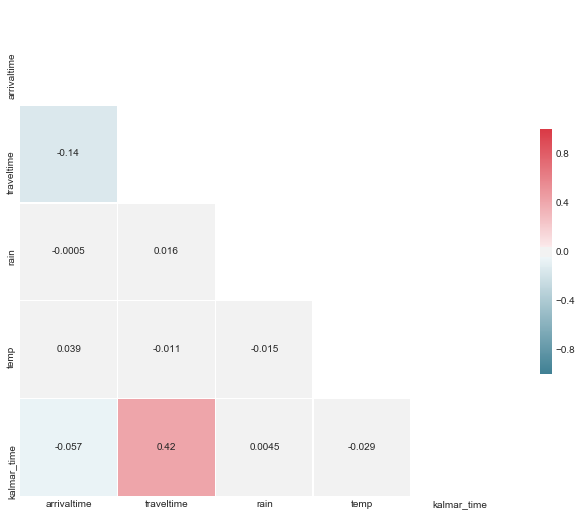

In [210]:
sns.set_style("white")
cont_corr = df.corr()
mask = np.zeros_like(cont_corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap=sns.diverging_palette(220,10, as_cmap = True)
sns.heatmap(cont_corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, xticklabels=True, yticklabels=True, linewidths=.5, cbar_kws={"shrink": .5})

### Linear Regression

In [211]:
import statsmodels.api as sm

In [212]:
# Converting Categorical into dummies
weekday_dummies = pd.get_dummies(df_X.dayofweek, prefix='dayofweek')
df_X_dummify = pd.concat([df_X,weekday_dummies],axis=1)

In [213]:
df_X_plots = df_X_dummify

In [214]:
from sklearn.model_selection import train_test_split
df_X_train_plots, df_X_test_plots, df_y_train_plots, df_y_test_plots = train_test_split(df_X_plots, df_y, test_size = 0.3, random_state = 100)

In [215]:
df_X_dummify.drop('dayofweek',axis=1,inplace=True)

In [216]:
df_X_dummify.head(1)

,arrivaltime,rain,temp,kalmar_time,dayofweek_Friday,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday
0,32380,0.0,13.1,45.5,0,0,0,0,1,0,0


In [217]:
df_X_dummify.std()

arrivaltime            15901.148036
rain                       0.534002
temp                       4.660570
kalmar_time                5.322757
dayofweek_Friday           0.362560
dayofweek_Monday           0.352412
dayofweek_Saturday         0.309431
dayofweek_Sunday           0.277493
dayofweek_Thursday         0.361571
dayofweek_Tuesday          0.385117
dayofweek_Wednesday        0.377488
dtype: float64

In [218]:
df_X_std = (df_X_dummify - df_X_dummify.mean()) / df_X_dummify.std()

In [219]:
from sklearn.model_selection import train_test_split
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_X_std, df_y, test_size = 0.3, random_state = 100)

In [220]:
X = sm.add_constant(df_X_train)
model = sm.OLS(df_y_train,X).fit()
print(model.params.tolist())

[111.12146095491734, -2.4305914184008035, 0.5410696569859431, 0.35366184747251467, 9.095095002328126, 0.32189422710691334, 1.2004494680329285, -1.886218241556711, -1.7833218225913903, 0.8479235711466567, 0.4210075677785044, 0.18552510545119777]


In [221]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             traveltime   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     106.6
Date:                Wed, 18 Jul 2018   Prob (F-statistic):          5.63e-197
Time:                        14:15:29   Log-Likelihood:                -17893.
No. Observations:                4047   AIC:                         3.581e+04
Df Residuals:                    4036   BIC:                         3.588e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 111.1215    

In [222]:
X_train_predict = model.predict(X.head(100))

In [223]:
X_train_mod_out = pd.DataFrame({'Actual_traveltime':df_y_train.head(100),'Predicted_traveltime':X_train_predict})
X_train_mod_out

,Actual_traveltime,Predicted_traveltime
4920,160.5,106.535372
5218,139.0,100.875663
3285,74.0,90.042810
181,141.0,128.657102
2347,78.0,108.474153
4284,71.0,96.782818
2248,120.0,102.511210
705,81.0,97.394728
1540,95.0,110.103416
5485,76.0,119.273927


In [224]:
from sklearn import metrics
y = X_train_mod_out.Actual_traveltime
predictions = X_train_mod_out.Predicted_traveltime
# print("Accuracy: ", metrics.accuracy_score(y, predictions))
# print("Confusion matrix: \n", metrics.confusion_matrix(y, predictions))
# print("Classification report:\n ", metrics.classification_report(y, predictions))

In [225]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, median_absolute_error
print("Mean Absolute Error: ",mean_absolute_error(y, predictions))
print("Mean Squared Error",mean_squared_error(y,predictions))

Mean Absolute Error:  15.80361720033313
Mean Squared Error 376.5307900193758


### Support Vector Regression

In [226]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [227]:
# svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
# svr_lin = SVR(kernel='linear', C=1e3)
# svr_poly = SVR(kernel='poly', C=1e3, degree=2)

In [228]:
# y_rbf = svr_rbf.fit(df_X_train,df_y_train).predict(df_X_train)
# y_lin = svr_lin.fit(df_X_train,df_y_train).predict(df_X_train)
# y_poly = svr_poly.fit(df_X_train,df_y_train).predict(df_X_train)

In [229]:
# lw = 2
# plt.scatter(df_X_train, df_y_train, color='darkorange', label='data')
# plt.plot(df_X_train, y_rbf, color='navy', lw=lw, label='RBF model')
# plt.plot(df_X_train, y_lin, color='c', lw=lw, label='Linear model')
# plt.plot(df_X_train, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
# plt.xlabel('data')
# plt.ylabel('target')
# plt.title('Support Vector Regression')
# plt.legend()
# plt.show()

In [230]:
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(df_X_train, df_y_train) 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [231]:
clf.score(df_X_train,df_y_train)

0.21471444727233058

In [232]:
X_test_Predict = clf.predict(df_X_test.dropna())

In [233]:
X_train_mod_out = pd.DataFrame({'Actual_traveltime':df_y_test,'Predicted_traveltime':X_test_Predict})

In [234]:
X_train_mod_out

,Actual_traveltime,Predicted_traveltime
228,93.0,108.469936
4528,89.0,92.159511
423,90.0,92.847688
2643,88.0,110.951308
4126,92.0,96.858495
791,109.0,105.105327
5122,93.0,114.930682
2453,113.0,110.199198
1218,109.0,98.136806
3559,111.0,123.029730


In [235]:
y = X_train_mod_out.Actual_traveltime
predictions = X_train_mod_out.Predicted_traveltime
print("Mean Absolute Error: ",mean_absolute_error(y, predictions))
print("Mean Squared Error",mean_squared_error(y,predictions))

Mean Absolute Error:  16.05362348593394
Mean Squared Error 406.72296800147205


In [236]:
# Trying a different model
clf = SVR(kernel='linear',C=1.0, epsilon=0.2)
clf.fit(df_X_train, df_y_train) 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [237]:
clf.score(df_X_train,df_y_train)

0.2006790064333165

In [238]:
X_test_Predict = clf.predict(df_X_test)
X_train_mod_out = pd.DataFrame({'Actual_traveltime':df_y_test,'Predicted_traveltime':X_test_Predict})
X_train_mod_out

,Actual_traveltime,Predicted_traveltime
228,93.0,108.685800
4528,89.0,90.023786
423,90.0,97.735315
2643,88.0,110.000907
4126,92.0,92.540057
791,109.0,105.407702
5122,93.0,116.265371
2453,113.0,113.691796
1218,109.0,98.180855
3559,111.0,120.993794


In [239]:
y = X_train_mod_out.Actual_traveltime
predictions = X_train_mod_out.Predicted_traveltime
print("Mean Absolute Error: ",mean_absolute_error(y, predictions))
print("Mean Squared Error",mean_squared_error(y,predictions))

Mean Absolute Error:  15.94046571044281
Mean Squared Error 401.9854674109255


In [240]:
# Trying a different model
clf = SVR(kernel='poly',C=1.0, epsilon=0.2)
clf.fit(df_X_train, df_y_train) 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [241]:
X_test_Predict = clf.predict(df_X_test)
X_train_mod_out = pd.DataFrame({'Actual_traveltime':df_y_test,'Predicted_traveltime':X_test_Predict})
X_train_mod_out

,Actual_traveltime,Predicted_traveltime
228,93.0,110.619274
4528,89.0,91.862783
423,90.0,90.424857
2643,88.0,110.750615
4126,92.0,96.969168
791,109.0,107.236224
5122,93.0,119.899373
2453,113.0,112.030386
1218,109.0,102.552486
3559,111.0,117.843071


In [242]:
y = X_train_mod_out.Actual_traveltime
predictions = X_train_mod_out.Predicted_traveltime
print("Mean Absolute Error: ",mean_absolute_error(y, predictions))
print("Mean Squared Error",mean_squared_error(y,predictions))

Mean Absolute Error:  16.0812031433157
Mean Squared Error 406.943607939541


### Random Forest

In [243]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(df_X_train, df_y_train)

ValueError: Unknown label type: 'continuous'

In [ ]:
rfc._

In [ ]:
rfc_imp = pd.DataFrame()
rfc_imp['Features']=df_X_train.columns
rfc_imp['Rel']=rfc.feature_importances_

In [ ]:
rfc_imp.sort_values(by='Rel', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

In [ ]:
rfc_predictions = rfc.predict(df_X_train.head(100))
df_true_vs_rfc_predicted = pd.DataFrame({'ActualClass': df_y_train.head(100), 'PredictedClass': rfc_predictions})
df_true_vs_rfc_predicted

In [ ]:
from sklearn.metrics import accuracy_score
y = df_true_vs_rfc_predicted.ActualClass
predictions = df_true_vs_rfc_predicted.PredictedClass
print("Mean Absolute Error: ",mean_absolute_error(y, predictions))
print("Mean Squared Error",mean_squared_error(y,predictions))

> Random Forest has been the best predictors for now as compared to all the other Linear and SVR models

### ADA Boosting

In [ ]:
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
regr_1 = DecisionTreeRegressor(max_depth=4)

In [ ]:
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)

In [ ]:
regr_1.fit(df_X_train, df_y_train)
regr_2.fit(df_X_train, df_y_train)

In [ ]:
y_1 = regr_1.predict(df_X_train)
y_2 = regr_2.predict(df_X_train)

In [ ]:
# plt.figure()
# plt.scatter(df_X_train_plots['dayofweek'], df_y_train, c="k", label="training samples")
# plt.plot(df_X_train_plots['dayofweek'], y_1, c="g", label="n_estimators=1", linewidth=2)
# plt.plot(df_X_train_plots['dayofweek'], y_2, c="r", label="n_estimators=300", linewidth=2)
# plt.xlabel("data")
# plt.ylabel("target")
# plt.title("Boosted Decision Tree Regression")
# plt.legend()
# plt.show()

In [ ]:
decisiontreepred = pd.DataFrame({'ActualClass': df_y_train, 'PredictedClass': y_1})
adaboostpred = pd.DataFrame({'ActualClass': df_y_train, 'PredictedClass': y_2})

In [ ]:
from sklearn.metrics import accuracy_score
y = decisiontreepred.ActualClass
predictions = decisiontreepred.PredictedClass
print("Mean Absolute Error: ",mean_absolute_error(y, predictions))
print("Mean Squared Error",mean_squared_error(y,predictions))

In [ ]:
from sklearn.metrics import accuracy_score
y = adaboostpred.ActualClass
predictions = adaboostpred.PredictedClass
print("Mean Absolute Error: ",mean_absolute_error(y, predictions))
print("Mean Squared Error",mean_squared_error(y,predictions))

In [ ]:
adaboostpred

## This is a time series analysis model ... Hence the y values have to be dependent on previoud y values and not just on X values

In [ ]:
# Trying the moving exponential solution

In [ ]:
ewma = pd.stats.moments.ewma

In [ ]:
EMOV_n = ewma( df_y, com=2 )

In [ ]:
len(EMOV_n)

In [ ]:
len(df_X)

In [ ]:
df_Xs = np.column_stack((df_X_std,EMOV_n))

In [ ]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit ( df_X_std, df_y )
print(clf.coef_)

In [ ]:
y_pred = clf.predict(df_X_std)

In [ ]:
emov_pred = pd.DataFrame({'ActualClass': df_y, 'PredictedClass': y_pred})

In [ ]:
emov_pred

In [ ]:
y = emov_pred.ActualClass
predictions = emov_pred.PredictedClass
print("Mean Absolute Error: ",mean_absolute_error(y, predictions))
print("Mean Squared Error",mean_squared_error(y,predictions))